# Polynomial Regression

## Importing the libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## Importing the dataset

In [2]:
dataset = pd.read_csv('drag_coef.csv')
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values

## Splitting the dataset into the Training set and Test set

In [3]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

## Training the Polynomial Regression model on the Training set

In [4]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
poly_reg = PolynomialFeatures(degree = 3)
X_poly = poly_reg.fit_transform(X_train)
regressor = LinearRegression()
regressor.fit(X_poly, y_train)

LinearRegression()

## Predicting the Test set results

In [5]:
y_pred = regressor.predict(poly_reg.transform(X_test))
y_pred_train = regressor.predict(poly_reg.transform(X_train))
np.set_printoptions(precision=2)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

[[ 6.96e+01  1.49e+00]
 [ 1.01e+02  2.20e+01]
 [ 9.44e+01  1.17e+01]
 [ 4.28e+01  6.23e+01]
 [ 7.31e+01  1.26e+00]
 [ 1.15e+02  1.92e+01]
 [ 1.01e+02  8.22e+01]
 [ 7.94e+01  2.24e+02]
 [ 3.79e+01  1.00e+00]
 [ 7.95e+01  5.26e+01]
 [ 1.18e+02  2.96e+02]
 [ 8.79e+01  6.92e+01]
 [-5.69e+01  1.45e+00]
 [ 1.09e+02  1.07e+02]
 [ 8.66e+01  7.48e+01]
 [ 9.35e+01  5.42e+00]
 [ 4.20e+01  1.36e+01]
 [ 2.13e+01  1.03e+00]
 [ 9.32e+01  3.84e+00]
 [ 1.19e+02  2.69e+02]
 [ 6.89e+01  8.61e-01]
 [ 1.06e+02  6.20e+00]
 [ 4.29e+01  1.16e+02]
 [ 6.80e+01  5.61e+00]
 [ 1.01e+02  1.26e+01]
 [ 8.69e+01  1.44e+02]
 [ 9.34e+01  4.95e+00]
 [ 1.98e+01  1.84e+00]
 [ 6.48e+01  1.29e+00]
 [ 1.06e+02  2.06e+00]
 [ 6.40e+01  8.64e-01]
 [ 5.37e+01  1.17e+00]
 [ 8.08e+01  7.14e+00]
 [ 8.28e+01  2.57e+00]
 [ 1.22e+02  1.12e+01]
 [ 1.13e+02  3.72e+01]
 [ 1.04e+02  2.56e+00]
 [ 8.15e+01  7.10e+01]
 [ 9.17e+01  3.12e+00]
 [ 8.93e+01  2.55e+01]
 [ 1.22e+02  5.73e+00]
 [ 1.19e+02  3.76e+01]
 [ 4.39e+01  1.18e+00]
 [ 1.20e+02

## Evaluating the Model Performance

In [6]:
from sklearn.metrics import r2_score, mean_squared_error
print('R_2 Score :', r2_score(y_test, y_pred))
print('Mean Squared Error :', mean_squared_error(y_test, y_pred))
print('MSE for Training set:', mean_squared_error(y_train, y_pred_train))
print('R_2 score for Training set:',r2_score(y_train, y_pred_train))

R_2 Score : 0.024932545519315563
Mean Squared Error : 26961.765863359975
MSE for Training set: 59503.891747171154
R_2 score for Training set: 0.0295538819249469


##Plotting Results

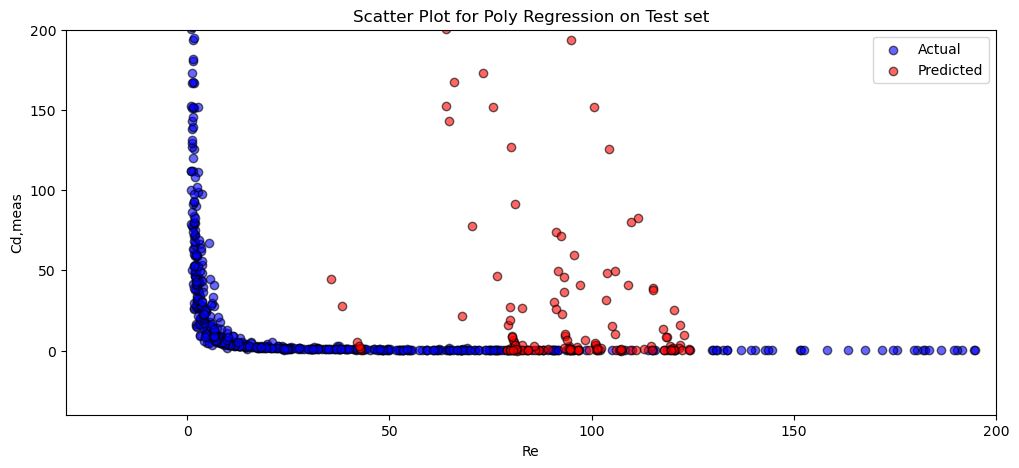

In [7]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12,5))
plt.scatter( y ,X[:,-1], c = 'blue'  ,edgecolors='black', alpha=0.6, label = 'Actual')
plt.scatter( y_pred ,X_test[:,-1], c = 'red' , edgecolors='black', alpha=0.6,label = 'Predicted')
##plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', label='Ideal')
plt.ylim(-40, 200)
plt.xlim(-30, 200)
plt.title('Scatter Plot for Poly Regression on Test set')
plt.ylabel('Cd,meas')
plt.xlabel('Re')
plt.legend()

In [8]:
print('R_2 Score :', r2_score(y_pred, X_test[:,-1]))

R_2 Score : -343.4501971581916


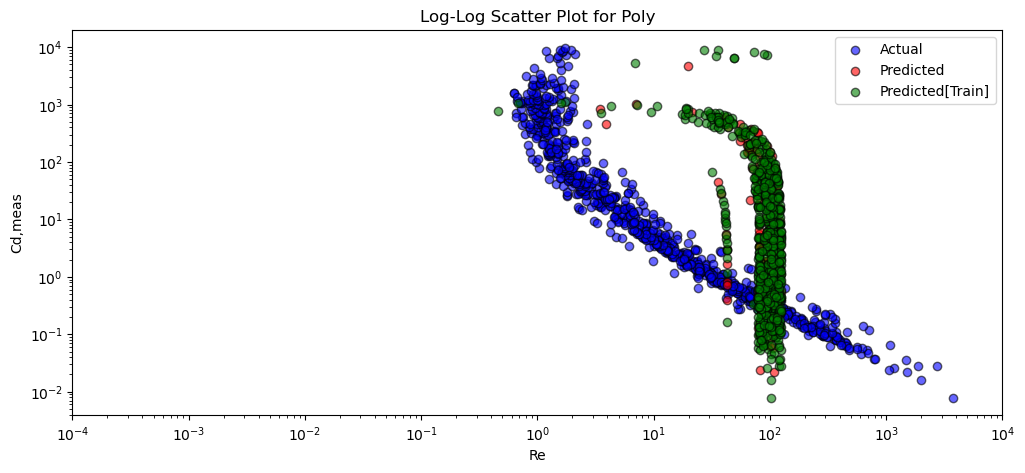

In [9]:
plt.figure(figsize=(12, 5))

plt.scatter(y, X[:, -1], c='blue',edgecolors='black', alpha=0.6, label='Actual')
plt.scatter(y_pred, X_test[:, -1], c='red',edgecolors='black', alpha=0.6, label='Predicted')
plt.scatter( y_pred_train ,X_train[:,-1], c = 'green' ,edgecolors='black', alpha=0.6, label = 'Predicted[Train]')
plt.xscale('log')
plt.yscale('log')
plt.xlim(0.0001,10000)
plt.title('Log-Log Scatter Plot for Poly')
plt.ylabel('Cd,meas')
plt.xlabel('Re')
plt.legend()
plt.show()

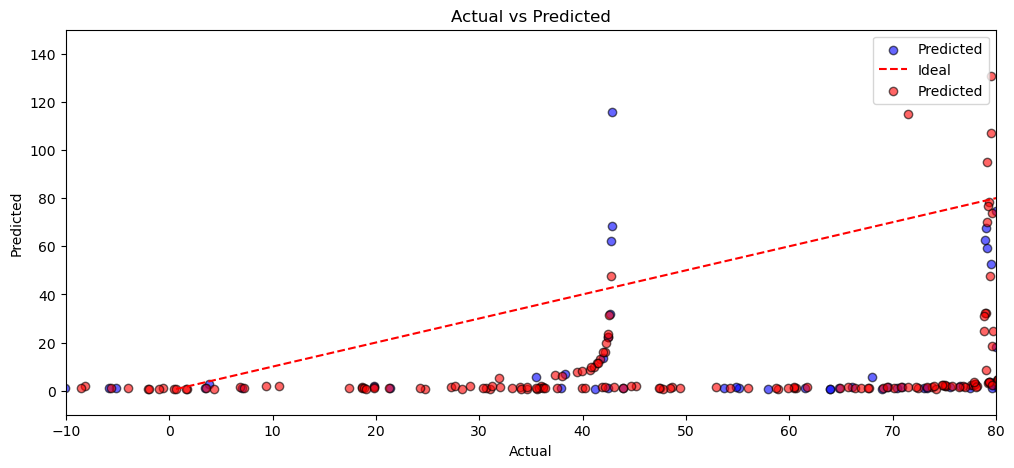

In [10]:
plt.figure(figsize=(12,5))
plt.scatter(y_pred,y_test, color='blue',edgecolors='black', alpha=0.6, label='Predicted')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', label='Ideal')
plt.scatter(y_pred_train,y_train, color='red',edgecolors='black', alpha=0.6, label='Predicted')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.xlim(-10, 80)
plt.ylim(-10, 150)
plt.title('Actual vs Predicted')
plt.legend()
plt.show()

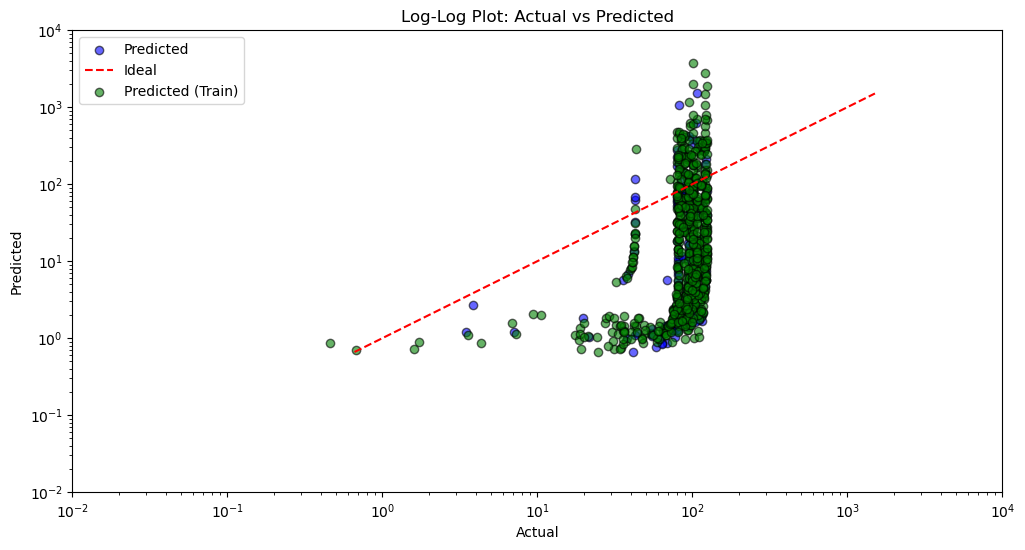

In [11]:
plt.figure(figsize=(12, 6))

plt.scatter(y_pred, y_test, color='blue',edgecolors='black', alpha=0.6, label='Predicted')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', label='Ideal')
plt.scatter(y_pred_train, y_train, color='green',edgecolors='black', alpha=0.6, label='Predicted (Train)')

plt.xscale('log')
plt.yscale('log')

plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.ylim(0.01,10000)
plt.xlim(0.01,10000)

plt.title('Log-Log Plot: Actual vs Predicted')
plt.legend()

plt.show()

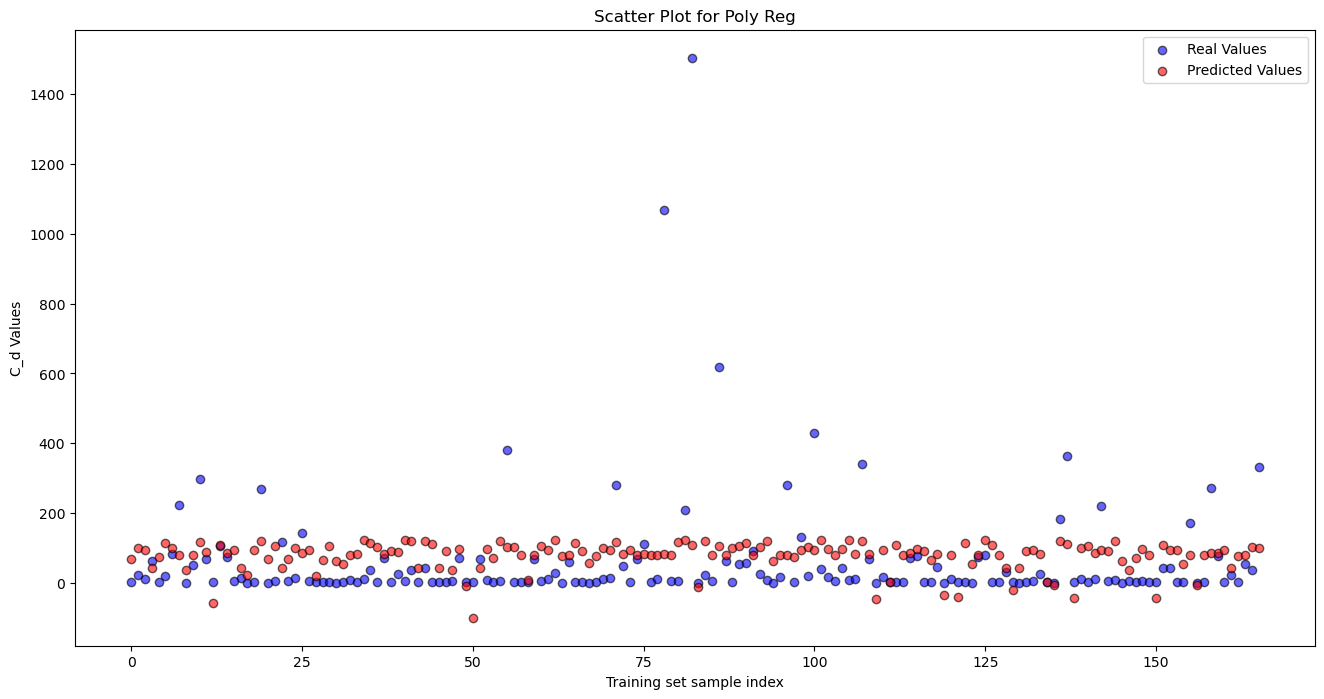

In [12]:
plt.figure(figsize=(16,8))
plt.scatter(range(len(y_test)), y_test, color = 'blue',edgecolors='black', alpha=0.6,label='Real Values')
plt.scatter(range(len(y_pred)), y_pred , color = 'red',edgecolors='black', alpha=0.6,label='Predicted Values')
plt.title('Scatter Plot for Poly Reg')
plt.xlabel('Training set sample index')
plt.ylabel('C_d Values')
plt.legend()
plt.show()

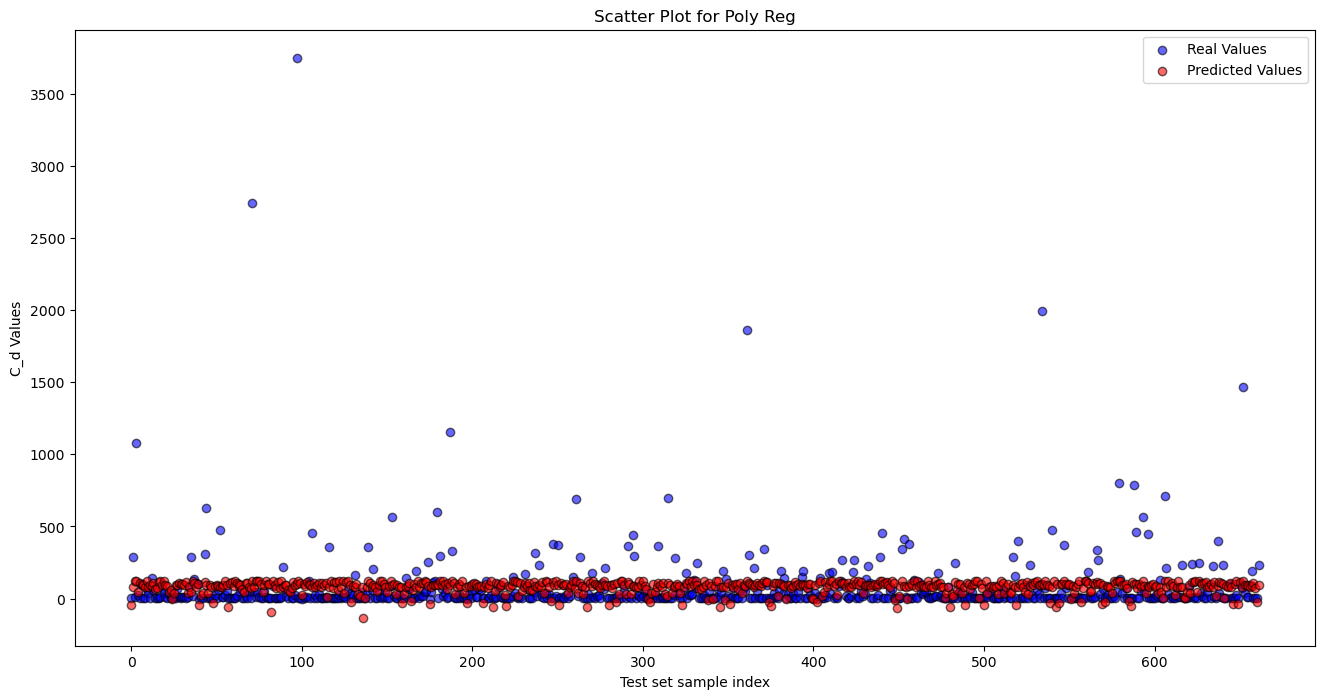

In [13]:
plt.figure(figsize=(16,8))
plt.scatter(range(len(y_train)), y_train, color = 'blue',edgecolors='black', alpha=0.6,label='Real Values')
plt.scatter(range(len(y_pred_train)), y_pred_train , color = 'red',edgecolors='black', alpha=0.6,label='Predicted Values')
plt.title('Scatter Plot for Poly Reg')
plt.xlabel('Test set sample index')
plt.ylabel('C_d Values')
plt.legend()
plt.show()